# Using Machine Learning Tools: Assignment 1

## Overview

In this assignment, you will apply some popular machine learning techniques to the problem of predicting bike rental demand. A data set has been provided containing records of bike rentals in Seoul, collected during 2017-18.

The scenario for this assignment is that you are a new employee of a company (that rents bikes, alongside other activities) and you have been assigned the task of predicting the bike rentals. Your line manager has given you some instructions (those shown below) but is expecting you to be able to do this task without close supervision and to report back with understandable and concise text, graphics and code (and of course the company wants a copy of all the code required to perform this task). Naturally, you are wanting to show that you are a valuable member of the company and although the company allows the use of ChatGPT, you will want to show that you are making useful contributions and that you bring value to the company beyond just being able to type instructions into ChatGPT, as otherwise the company might replace you with a cheaper data entry employee. Hence, you should use ChatGPT whenever you like (or whenever instructed to - see later) but do highlight how your own knowledge and judgement makes a contribution.

The main aims of this assignment are: 

- to practice using tools for loading and viewing data sets;
- to check data for common pitfalls and clean it up;
- to plan a simple experiment and prepare the data accordingly;
- to run your experiment and to report and interpret your results clearly and concisely.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.

## General instructions

This assignment is divided into several tasks. Use the spaces provided in this notebook to answer the questions posed in each task. Some questions require writing code, some require graphical results, and some require short comments or analysis as text. It is your responsibility to make sure your responses are clearly labelled and your code has been fully executed (with the correct results displayed) before submission!

**Do not** manually edit the data set file we have provided! For marking purposes, it's important that your code is written to be able to be run correctly on the original data file.

When creating graphical output, label is clearly, with appropriate titles, xlabels and ylabels, as appropriate.

Most of the tasks in this assignment only require writing a few lines of code! One goal of the assignment is explore [sklearn](https://scikit-learn.org/stable/index.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/index.html), [matplotlib](https://matplotlib.org/stable/index.html) and other libraries you will find useful throughout the course, so feel free to use the functions they provide. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

Chapter 2 of the reference book is based on a similar workflow to this prac, so you may look there for some further background and ideas. You can also use any other general resources on the internet that are relevant, including ChatGPT, although do not use someone else's code or answers that directly relate to these questions. If you take a large portion of code or text from the internet or ChatGPT then you should reference where this was taken from, but we do not expect any references for small pieces of code, such as from documentation, blogs or tutorials. Taking, and adapting, small portions of code is expected and is common practice when solving real problems.

The following code imports some of the essential libraries that you will need. You should not need to modify it, but you are expected to import other libraries as needed.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import pandas as pd
assert pd.__version__ >= "1.0"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Step 1: Loading and initial processing of the dataset (40%)

Download the data set `SeoulBikeData.csv` **from MyUni** using the link provided on the assignment page. 

The data is stored in a CSV (comma separated values) file and contains the following information 

 - Date: year-month-day
 - Rented Bike Count: Count of bikes rented at each hour
 - Hour: Hour of the day
 - Temperature: Temperature in degrees Celsius
 - Humidity: %
 - Windspeed: m/s
 - Visibility: 10m
 - Dew point temperature: degrees Celsius
 - Solar radiation: MJ/m2
 - Rainfall: mm
 - Snowfall: cm
 - Seasons: Winter, Spring, Summer, Autumn
 - Holiday: Holiday/No holiday
 - Functional Day: NoFunc(Non Functional Hours), Fun(Functional hours)

### 1.1 Load and visualise the data

**Load the data set from the csv file into a DataFrame, summarise it in text using one pandas function, and then visualise each feature with one type of plot (this can be different for each feature).**

In [2]:
### Your code here
bike_data = pd.read_csv('SeoulBikeData.csv')
bike_data.head()

,Date,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37.0,2.2,2000,-17.6,0,0,0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38.0,0.8,2000,-17.6,0,0,0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39.0,1.0,2000,-17.7,0,0,0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40.0,0.9,2000,-17.6,0,0,0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36.0,2.3,2000,-18.6,0,0,0,Winter,No Holiday,Yes


In [3]:
bike_data.describe()

,Rented Bike Count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,714.876027,11.500000,12.945765,58.268014,1.848950,1436.825799,4.073813
std,1160.468927,6.922582,12.376168,20.807845,10.665215,608.298712,13.060369
min,0.000000,0.000000,-17.800000,-2.200000,-0.700000,27.000000,-30.600000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000
75%,1066.000000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000
max,90997.000000,23.000000,195.000000,455.000000,991.100000,2000.000000,27.200000


In [4]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature (C)            8760 non-null   float64
 4   Humidity (%)               8760 non-null   float64
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature (C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   object 
 9   Rainfall(mm)               8760 non-null   object 
 10  Snowfall (cm)              8760 non-null   object 
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

array([[<Axes: title={'center': 'Rented Bike Count'}>,
        <Axes: title={'center': 'Hour'}>,
        <Axes: title={'center': 'Temperature (C)'}>],
       [<Axes: title={'center': 'Humidity (%)'}>,
        <Axes: title={'center': 'Wind speed (m/s)'}>,
        <Axes: title={'center': 'Visibility (10m)'}>],
       [<Axes: title={'center': 'Dew point temperature (C)'}>, <Axes: >,
        <Axes: >]], dtype=object)

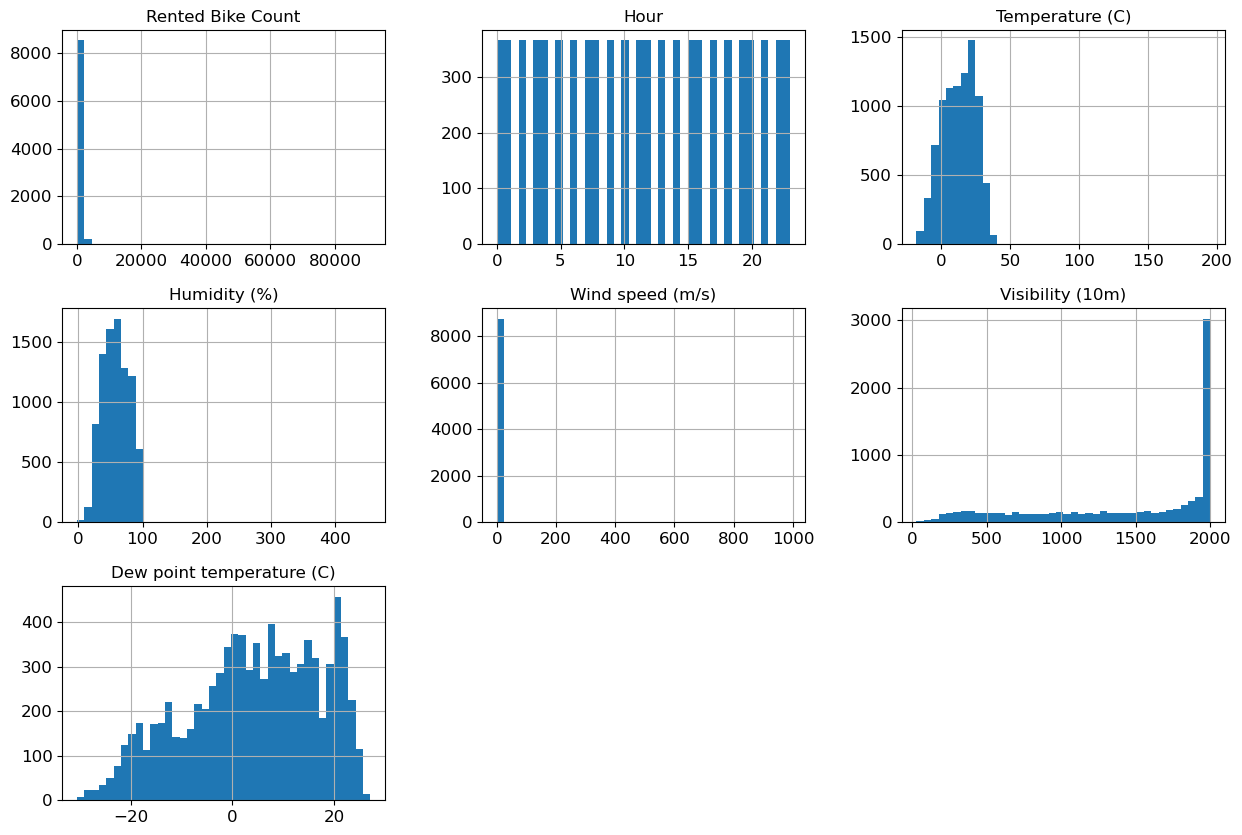

In [6]:
"""Visualise using histograms"""
bike_data.hist(bins=40, figsize=(15,10))

### 1.2 Cleaning the data

Do the following to the data:
 - Using the "Functioning day" feature, **remove rows from the DataFrame** where the business is closed and then **delete the Functioning Day feature from the DataFrame**.
 - **Convert seasons to a one hot encoded format** (1 binary feature for each of the 4 seasons).
 - Replace the **Date** feature with a binary **Weekday** feature (1 for a weekday and 0 for weekend) using the code sample below or your own code.
 - **Convert remaining non-numerical features to a numerical format** or replace with NaN (i.e. `np.nan`) where not possible.
 - **Identify and fix any outliers and errors in the data**.

Save the result as a new csv file called `CleanedSeoulBikeData.csv` and **upload this** to MyUni along with this notebook when you submit your assignment.

In [7]:
## Example code for weekday feature mapping ##

import datetime
def date_is_weekday(datestring):
    ### return 0 if weekend, 1 if weekday
    dsplit = datestring.split('/')
    wday = datetime.datetime(int(dsplit[2]),int(dsplit[1]),int(dsplit[0])).weekday()
    return int(wday<=4)

In [8]:
### Your code here (and remember to upload the resulting csv)

bike_data_cleaned = bike_data.copy()
#print(bike_data_cleaned['Functioning Day'].value_counts())
bike_data_cleaned = bike_data_cleaned[bike_data_cleaned['Functioning Day'] == 'Yes'] # Removes rows where the business is closed
bike_data_cleaned = bike_data_cleaned.drop("Functioning Day", axis=1) # Delete the "Functioning Day" feature

"""Convert seasons to a one hot format"""
#print(bike_data_cleaned['Seasons'].value_counts())
seasons_onehot = pd.get_dummies(bike_data_cleaned['Seasons'],dtype= int)   # Convert the Seasons feature to a one hot format
bike_data_cleaned = pd.concat([bike_data_cleaned, seasons_onehot], axis=1)  # Add the one hot format to the dataframe
bike_data_cleaned = bike_data_cleaned.drop("Seasons", axis=1)



"""Replace the Date feature with Weekday"""
bike_data_cleaned.fillna(value=np.nan,inplace=True)                 # Replace all empty values with NaN
bike_data_cleaned = bike_data_cleaned.dropna(subset=['Date'])       # Remove rows with NaN in Date feature
bike_data_cleaned['Date'] = bike_data_cleaned['Date'].astype(str)   # Convert Date to string
bike_data_cleaned['Date'] = bike_data_cleaned['Date'].apply(date_is_weekday)   # Apply the date_is_weekday function to the Date feature
bike_data_cleaned = bike_data_cleaned.rename(columns={'Date': 'Weekday'})
#print(bike_data_cleaned.value_counts('Weekday'))


"""Covert remaining non-numerical features to a numerical format"""

#print(bike_data_cleaned['Solar Radiation (MJ/m2)'].value_counts())
bike_data_cleaned['Solar Radiation (MJ/m2)'] = bike_data_cleaned['Solar Radiation (MJ/m2)'].replace('w.39', np.nan)
bike_data_cleaned['Solar Radiation (MJ/m2)'] = bike_data_cleaned['Solar Radiation (MJ/m2)'].astype(float)    # Convert to float

bike_data_cleaned['Rainfall(mm)'] = bike_data_cleaned['Rainfall(mm)'].replace('No Record', np.nan)
bike_data_cleaned['Rainfall(mm)'] = bike_data_cleaned['Rainfall(mm)'].astype(float)

bike_data_cleaned['Snowfall (cm)'] = bike_data_cleaned['Snowfall (cm)'].replace('No Record', np.nan)
bike_data_cleaned['Snowfall (cm)'] = bike_data_cleaned['Snowfall (cm)'].astype(float)

bike_data_cleaned['Holiday'] = bike_data_cleaned['Holiday'].map({'No Holiday': 0, 'Holiday': 1})   # Convert to binary 0 for no holiday, 1 for holiday
#bike_data_cleaned.info()



Weekday: [0 0 0 ... 1 1 1]


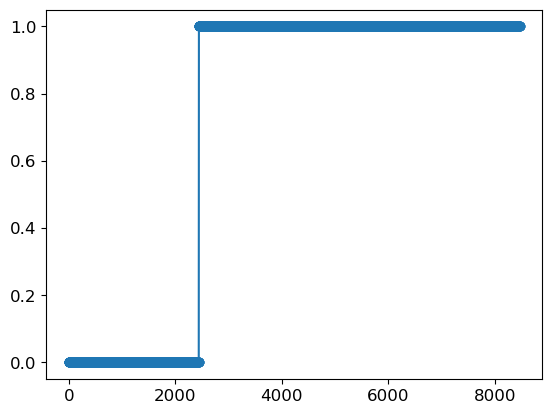

Rented Bike Count: [    2     2     2 ...  3418  3556 90997]


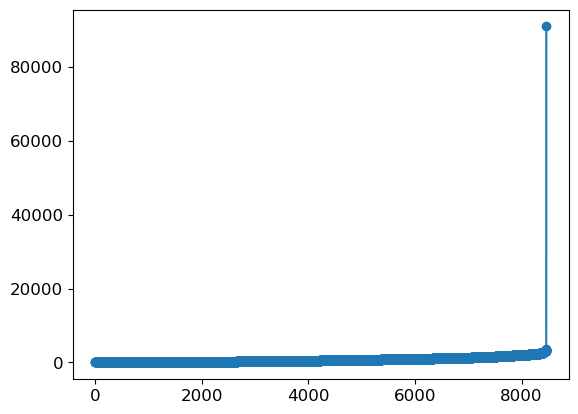

Hour: [ 0  0  0 ... 23 23 23]


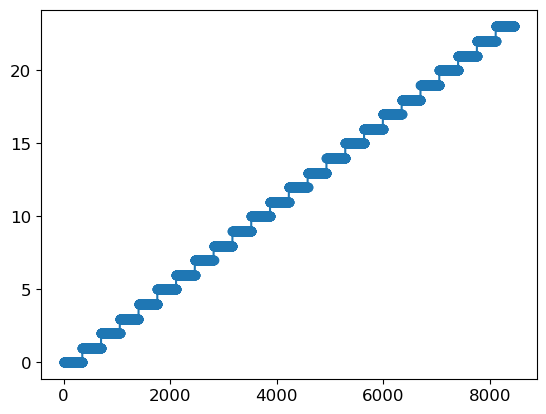

Temperature (C): [-17.8 -17.5 -17.5 ... 181.  186.  195. ]


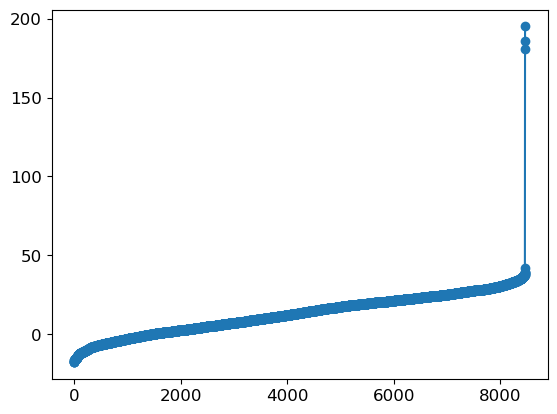

Humidity (%): [ -2.2   0.    0.  ...  98.   98.  455. ]


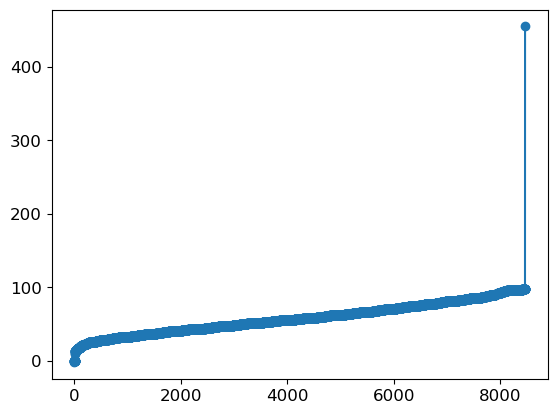

Wind speed (m/s): [-7.000e-01  0.000e+00  0.000e+00 ...  9.200e+00  9.180e+01  9.911e+02]


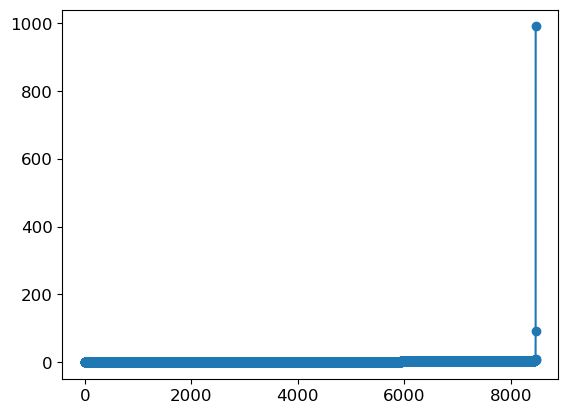

Visibility (10m): [  27   33   34 ... 2000 2000 2000]


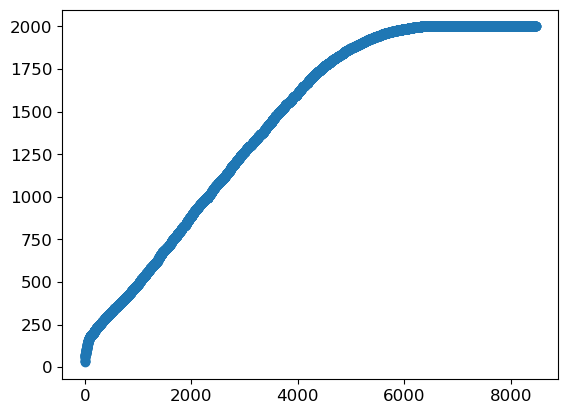

Dew point temperature (C): [-30.6 -30.5 -29.8 ...  26.8  26.8  27.2]


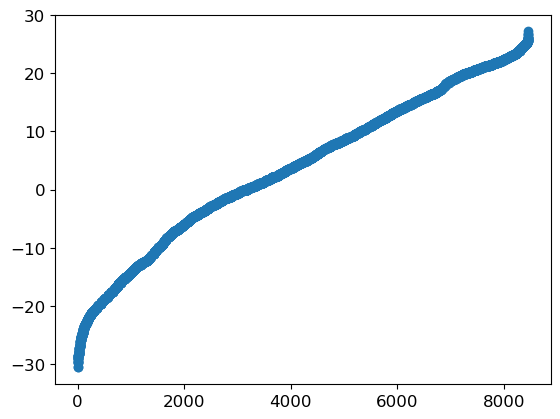

Solar Radiation (MJ/m2): [0.   0.   0.   ... 3.52 5.52  nan]


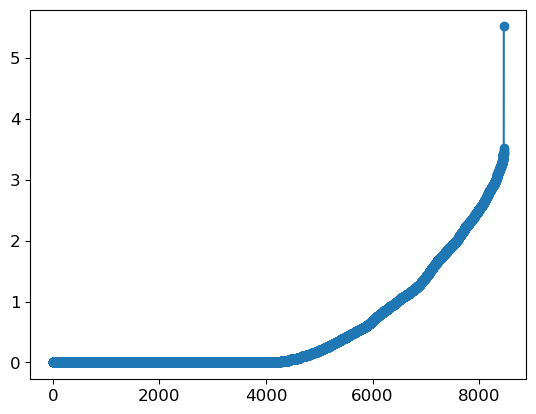

Rainfall(mm): [ 0.  0.  0. ... nan nan nan]


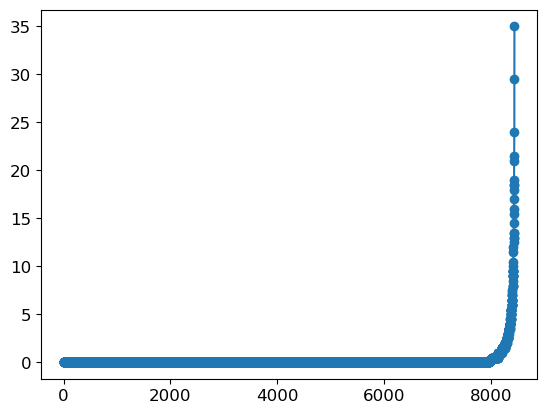

Snowfall (cm): [-0.4  0.   0.  ...  nan  nan  nan]


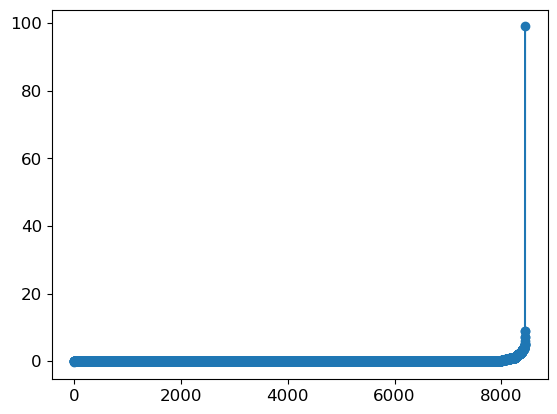

Holiday: [0 0 0 ... 1 1 1]


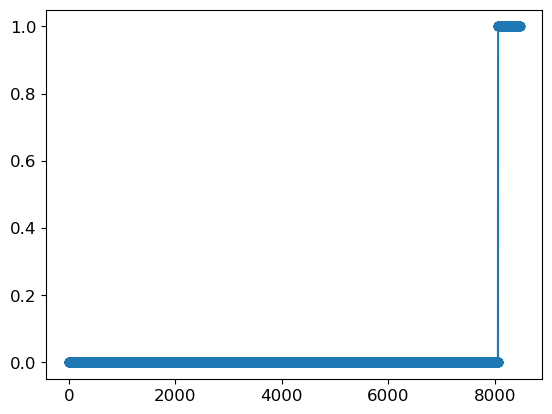

Autumn: [0 0 0 ... 1 1 1]


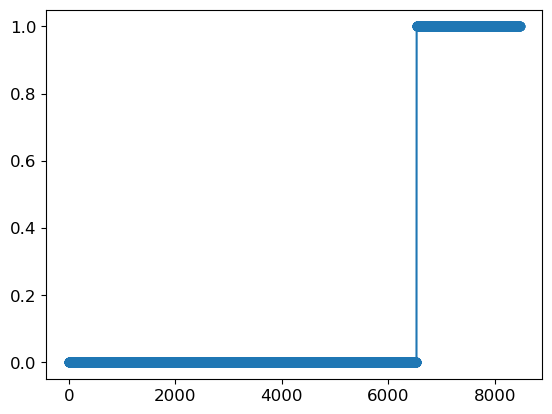

Spring: [0 0 0 ... 1 1 1]


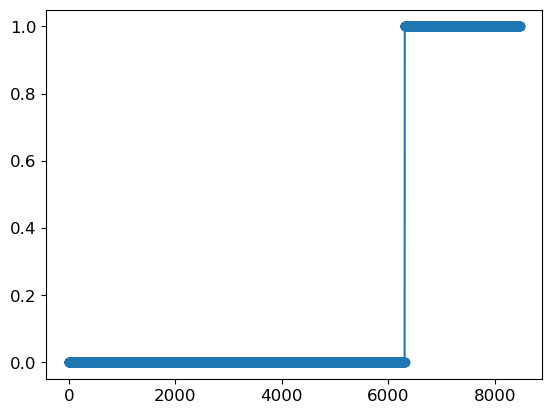

Summer: [0 0 0 ... 1 1 1]


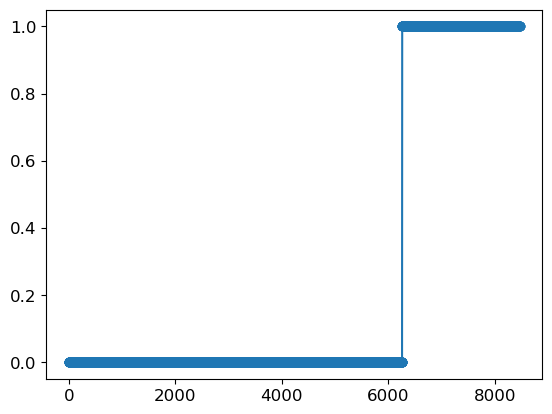

Winter: [0 0 0 ... 1 1 1]


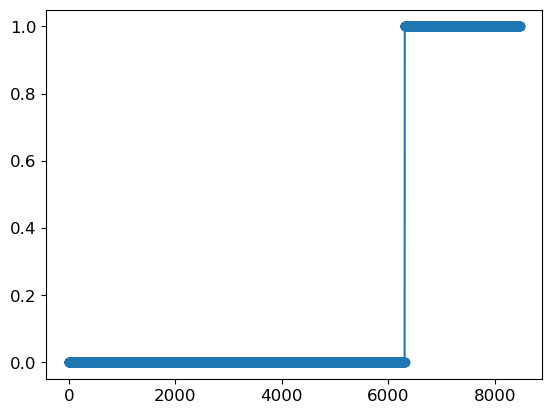

In [9]:
"""Identify and fix outliers"""
for feat in bike_data_cleaned.columns:
    # Check for outliers by looking at the distribution of each feature
    print(f'{feat}: {np.sort(bike_data_cleaned.loc[:,feat])}')
    
    plt.plot(np.sort(bike_data_cleaned.loc[:,feat]),'-o')
    plt.show()

In [10]:
# Changing the outliers to NaN in Wind speed, Snowfall and Humidity
bike_data_cleaned['Wind speed (m/s)'] = bike_data_cleaned['Wind speed (m/s)'].replace(-0.7, np.nan)
bike_data_cleaned['Snowfall (cm)'] = bike_data_cleaned['Snowfall (cm)'].replace(-0.4, np.nan)
bike_data_cleaned['Humidity (%)'] = bike_data_cleaned['Humidity (%)'].replace(-2.2, np.nan)

Rented Bike Count: [   2    2    2 ... 2379 2383 2387]


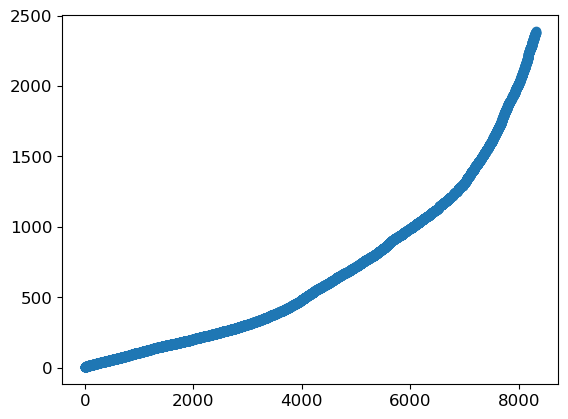

Temperature (C): [-17.8 -17.5 -17.5 ...  39.3  39.4  42. ]


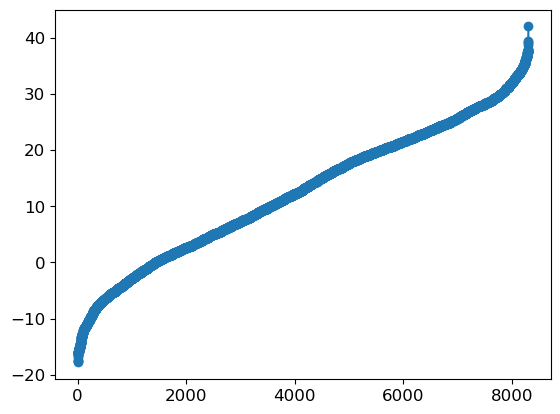

Humidity (%): [ 0.  0.  0. ... 98. 98. 98.]


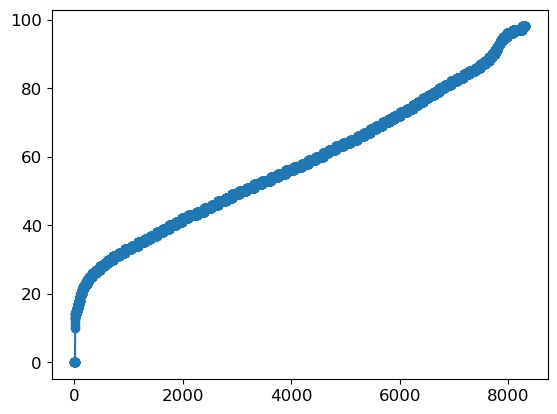

Wind speed (m/s): [0.  0.  0.  ... 4.3 4.3 4.3]


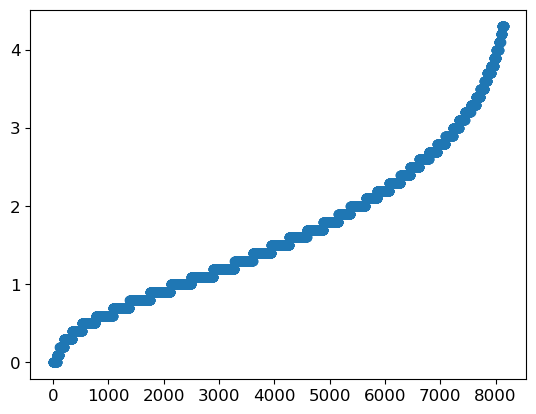

Solar Radiation (MJ/m2): [0.   0.   0.   ... 2.25 2.25 2.25]


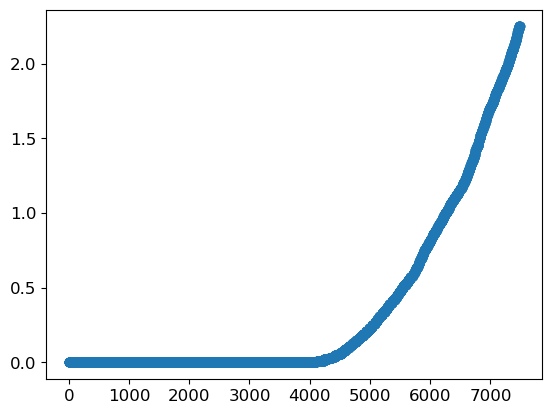

In [11]:
features = ['Rented Bike Count','Temperature (C)', 'Humidity (%)', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)']
for feat in features:
    # Using the IQR method to remove outliers
    q1 = bike_data_cleaned[feat].quantile(0.25)
    q3 = bike_data_cleaned[feat].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    bike_data_cleaned = bike_data_cleaned[(bike_data_cleaned[feat] >= lower_bound) & (bike_data_cleaned[feat] <= upper_bound)]
    # Checking the feature distribution after removing outliers
    print(f'{feat}: {np.sort(bike_data_cleaned.loc[:,feat])}')
    plt.plot(np.sort(bike_data_cleaned.loc[:,feat]),'-o')
    plt.show()

    

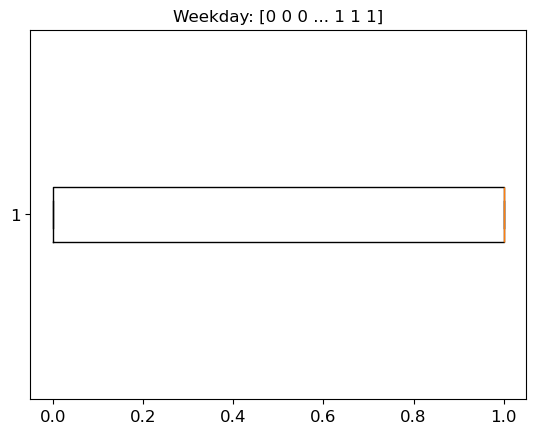

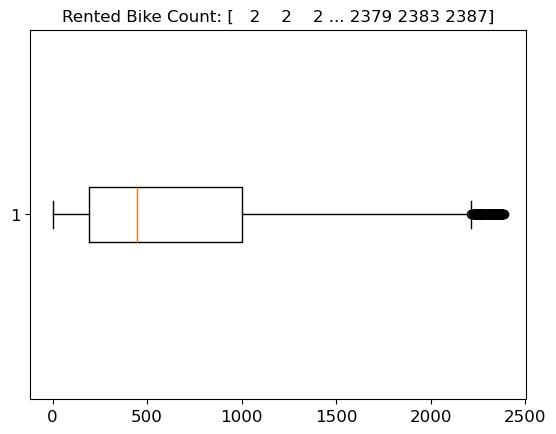

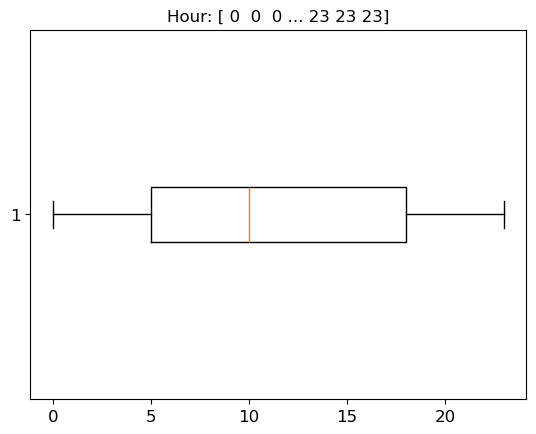

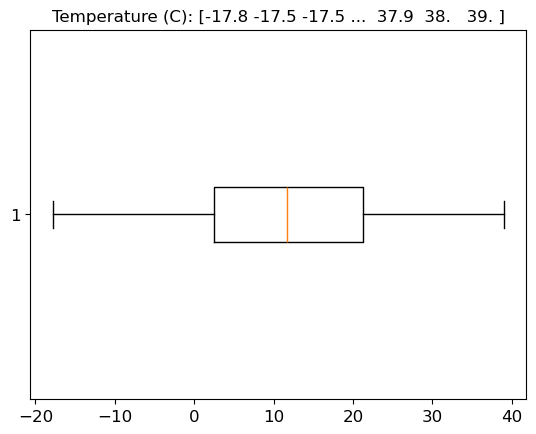

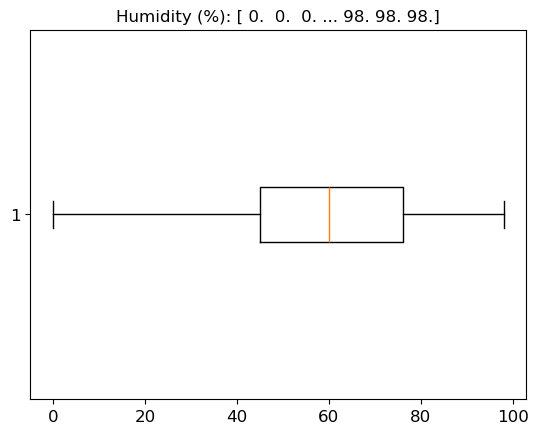

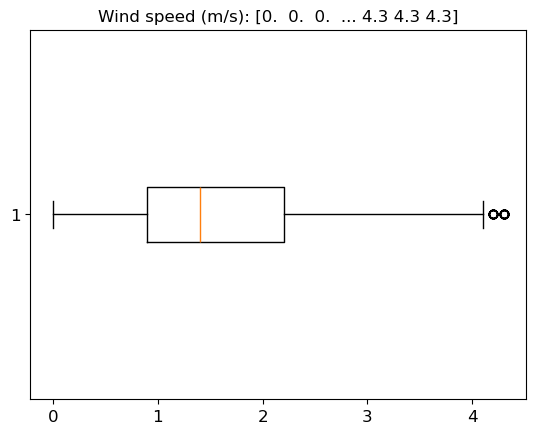

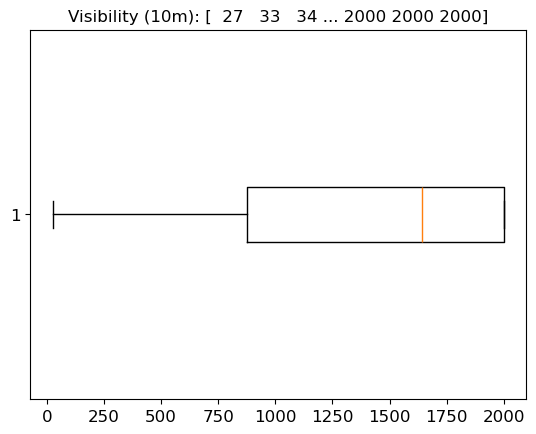

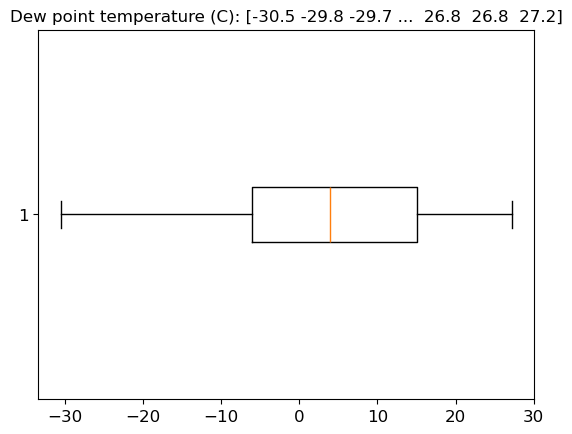

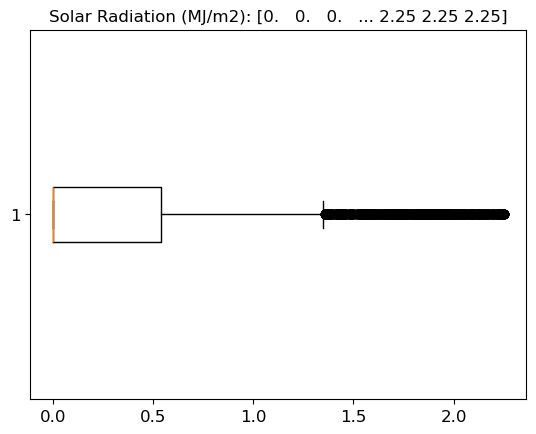

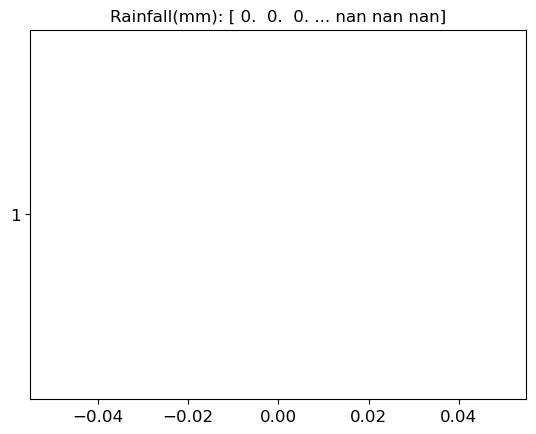

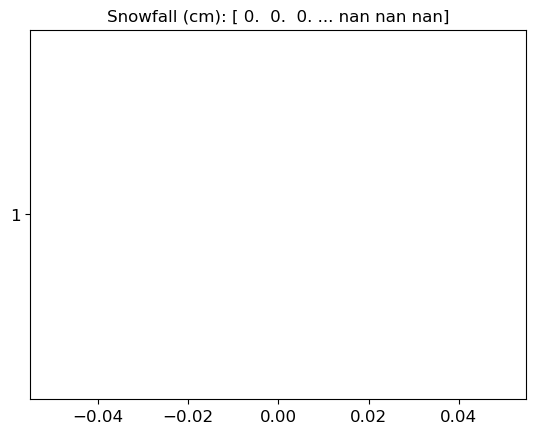

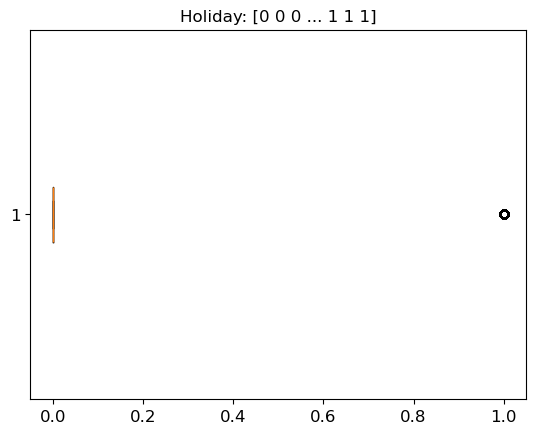

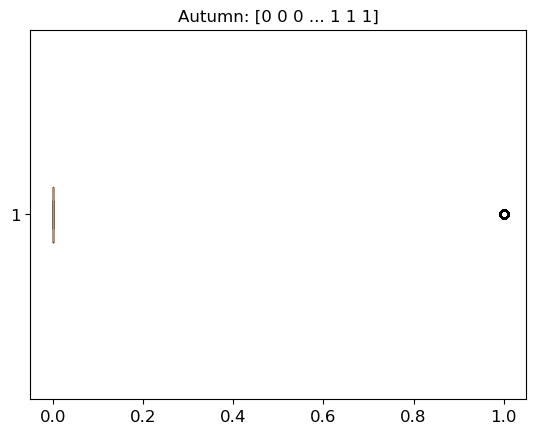

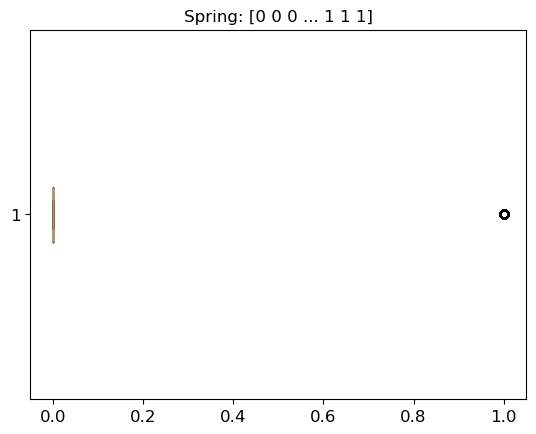

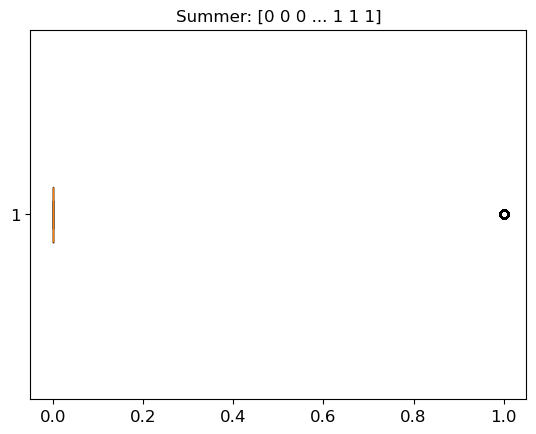

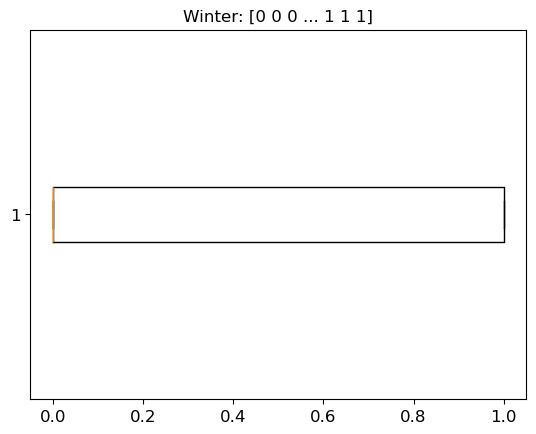

In [12]:
"""Visualise all the feature using boxplots after data cleaning """
for feat in bike_data_cleaned.columns:
    plt.boxplot(bike_data_cleaned[feat],vert=False)
    plt.title(f'{feat}: {np.sort(bike_data_cleaned.loc[:,feat])}')
    plt.show()

In [14]:
bike_data_cleaned.to_csv('CleanedSeoulBikeData.csv', index=False)  # Save the cleaned data to a new csv file

## Step 2: Pre-process the data and perform the first fit (20%)

### 2.1 Imputation and Pre-Processing

Make sure that you have set any problematic values in the numerical data to `np.nan` and then write code for a **sklearn *pipeline* that will perform imputation** to replace problematic entries (nan values) with an appropriate **median** value ***and* do any other pre-processing** that you think should be used.

In [15]:
### Your code here
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])


### 2.2 Predicting bike rentals

A regression approach will be used for this problem: that is, "bike rentals" will be treated as a real number whose value will be predicted. If necessary, it could be rounded to the nearest integer afterwards, but this will not be necessary here. The root mean squared error (RMSE) metric will be used to quantify performance.  

**Split the data** appropriately so that 20% of it will be kept as a hold-out test set. **Using the pipeline** you wrote above, pre-process and fit a ***linear regression* model** to the data in an appropriate way. After this, **calculate and print the RMSE of the fit to the training data**. 

To act as a simple baseline for comparison purposes, **also calculate and print the RMSE** that you would get if _all_ the predictions were set to be the **mean of the training targets** (i.e. bike rentals).

In [16]:
### Your code and outputs here
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
bike_data_cleaned_final = pd.read_csv('CleanedSeoulBikeData.csv')

Y = bike_data_cleaned_final['Rented Bike Count']
X = bike_data_cleaned_final.drop('Rented Bike Count', axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42) # Split the data into training and testing sets
all_pipeline = Pipeline([
    ('num', num_pipline),
    ('linreg', LinearRegression())
])
all_pipeline.fit(X_train, Y_train) # Fit the model to the training data
Y_train_pred = all_pipeline.predict(X_train) # Predict the training data
train_rmse = np.sqrt(mean_squared_error(Y_train, Y_train_pred)) # Calculate the RMSE of the training data
print("The RESE in training is:", train_rmse)


Y_train_mean = Y_train.mean()
Y_train_new = np.full_like(Y_train, Y_train_mean) # Create an array of the mean value of the training data
train_rmse_mean = np.sqrt(mean_squared_error(Y_train, Y_train_new)) # Calculate the RMSE 
print("The RMSE if all the predictions were equal to the mean of the training targets is:", train_rmse_mean)


The RESE in training is: 399.25282585309725
The RMSE if all the predictions were equal to the mean of the training targets is: 598.7628164145143


## Step 3: Hyper-parameter optimisation (30%)

**Use ChatGPT** (along with any modifications that you require) to create and run code (using sklearn pipelines) that will do the following:
 - fit a **linear regression** and a **Support Vector Regression** method to the data using **10-fold cross validation** for each model
 - display the **mean and standard deviation** of the **RMSE values** for each model (at baseline) in the _appropriate datasets_
 - perform a **hyper-parameter optimisation** on each model using **GridSearch**
 - display the **mean and standard deviation** of the **RMSE values** for each model (after optimisation) in the _appropriate datasets_
 - choose the **best model** and **visualise the results** with a single graphic of your choice

**Display the ChatGPT prompt** and the **code**, _including any fixes_ that you needed to make to get the code to work, along with the **outputs** obtained by running the code.


In [13]:
### Your ChatGPT prompt
"""
using pipeline to do the following tasks: 
1. fit a "linear regression" and a "Support Vector Regression" method to the data using "10-fold cross validation" for each model
2. display the "mean and standard deviation" of the "RMSE values" for each model (at baseline) in the appropriate datasets
3. perform a "hyper-parameter optimisation" on each model using "GridSearch"
4. display the "mean and standard deviation" of the "RMSE values" for each model (after optimisation) in the appropriate datasets
5. choose the "best model" and "visualise the results" with a single graphic of your choice
"""

Linear Regression RMSE: 401.379 , Standard deviation: 10.017
Support Vector Regression RMSE: 511.063 , Standard deviation: 18.156
Linear Regression Optimised RMSE :  401.379 , Standard deviation:  0.000
Support Vector Regression Optimised RMSE :  501.604 , Standard deviation:  99.681


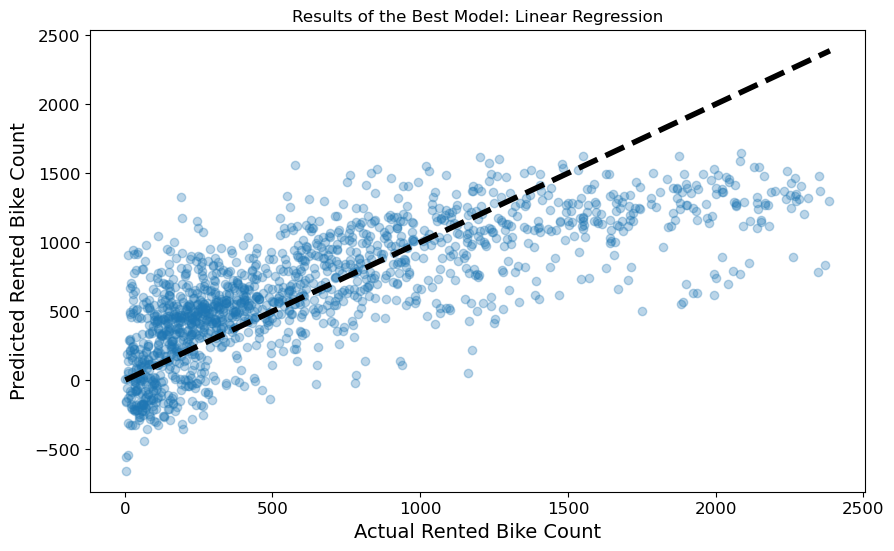

In [20]:
### Code here (with outputs)
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
# Define a function to calculate RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# Setup cross-validation scheme
cv = KFold(n_splits=10, random_state=42, shuffle=True)

# Pipelines for models
pipelines = {
    'Linear Regression': Pipeline([('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler()), ('regressor', LinearRegression())]),
    'Support Vector Regression': Pipeline([('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler()), ('regressor', SVR())])
}

# Evaluate models using cross-validation
scores = {}
for name, pipeline in pipelines.items():
    score = cross_val_score(pipeline, X_train, Y_train, cv=cv, scoring=rmse_scorer)
    scores[name] = score
    print(f"{name} RMSE: {-score.mean():.3f} , Standard deviation: {score.std():.3f}")
    
   
# Grid search space
param_grid = {
    'Linear Regression': {},
    'Support Vector Regression': {'regressor__C': [0.1, 1.0, 10.0], 'regressor__gamma': ['scale', 'auto']}
}

# Perform GridSearch
optimized_models = {}
for name, pipeline in pipelines.items():
    searcher = GridSearchCV(pipeline, param_grid[name], cv=cv, scoring=rmse_scorer)
    searcher.fit(X_train, Y_train)
    optimized_models[name] = searcher
    #print(f"Best parameters for {name}: {searcher.best_params_}")
    #print(f"Best Cross-validated RMSE for {name}: {-searcher.best_score_:.3f}")
    print(f"{name} Optimised RMSE : {-searcher.cv_results_['mean_test_score'].mean(): .3f} , Standard deviation: {searcher.cv_results_['mean_test_score'].std(): .3f}")
best_model_name = min(optimized_models, key=lambda x: optimized_models[x].best_score_)
best_model = optimized_models[best_model_name].best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# Plotting real vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.3)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title(f'Results of the Best Model: {best_model_name}')
plt.show()



## Step 4: Further improvements (10%)

Consider the code that you obtained from ChatGPT above and find one error, or one thing that could be improved, or one reasonable alternative (even if it might not necessarily lead to an improvement).  **Describe this error/improvement/alternative in the box below.**

In [ ]:
### Your answer here (maximum of 200 words)

"""
Error

ChatGPT did not provide the mean and standard deviation of RMSE for each model after hyper-parameter optimisation, instead,
it provided the best parameters and best RMSE.

ChatGPT should have used Y_test in this line of code plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4) instead of Y,
which is the whole Y dataset.
"""

"""
Improvement

Using more advanced techniques such as k-NN to handle the missing values and outliers could improve the model performance.

We can use correlation to measure the relationship between the features and the target, removing or combining 
correlated features can help in reducing dimensionality and improving model performance.

We can also try more complex and powerful models like Polynomial Regression, Decision Trees, Random Forests and things like that, to 
check if we can get better results.

To prevent overfitting, we can use Regularization techniques like Lasso and Ridge.

"""